In [ ]:
# Import necessary libraries
import os
import pathlib
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, Flatten, Dropout,
                                     MaxPooling2D, Activation, BatchNormalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub

print('TensorFlow Version: ', tf.__version__)
print('GPU Available: ', tf.test.is_gpu_available())
print('Using GPU: ', tf.config.experimental.list_physical_devices('GPU'))

TensorFlow Version:  2.13.0
GPU Available:  True
Using GPU:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
pip install kaggle

In [ ]:
from google.colab import files

files.upload()


Saving kaggle (15).json to kaggle (15).json


{'kaggle (15).json': b'{"username":"asvisen30","key":"dafc3d88707d54c3b60693bbae8a0b54"}'}

In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = r'"C:\Users\91977\Desktop\kaggle (6).json"'


In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/linjustin/train-val-test-tcga-coad-msi-mss",force='true')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kishanpayadi
Your Kaggle Key: ··········


100%|██████████| 5.48G/5.48G [01:24<00:00, 69.8MB/s]


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'


In [ ]:
import os

# Get the path to the `train-val-test-tcga-coad-msi-mss` directory.
path_to_dataset = '/path/to/train-val-test-tcga-coad-msi-mss'

# Get the path to the current working directory.
current_working_directory = os.getcwd()

# Copy the `train-val-test-tcga-coad-msi-mss` directory to the current working directory.
os.system(f'cp -r {path_to_dataset} {current_working_directory}')


256

In [ ]:
import os

# Get the path to the `train-val-test-tcga-coad-msi-mss` directory.
path_to_dataset = os.path.join(os.getcwd(), 'train-val-test-tcga-coad-msi-mss')


In [ ]:
PATH = 'train-val-test-tcga-coad-msi-mss/tcga_coad_msi_mss/'
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'val')
test_dir = os.path.join(PATH, 'test')

train_msimut_dir = os.path.join(train_dir, 'MSIMUT')
train_mss_dir = os.path.join(train_dir, 'MSS')
val_msimut_dir = os.path.join(val_dir, 'MSIMUT')
val_mss_dir = os.path.join(val_dir, 'MSS')
test_msimut_dir = os.path.join(test_dir, 'MSIMUT')
test_mss_dir = os.path.join(test_dir, 'MSS')

In [ ]:
import os
import random

def keep_specific_number_of_images(train_msimut_dir, target_count):
    file_list = os.listdir(train_msimut_dir)
    random.shuffle(file_list)
    excess_count = max(0, len(file_list) - target_count)
    for i in range(excess_count):
        file_name = file_list[i]
        file_path = os.path.join(train_msimut_dir, file_name)
        os.remove(file_path)
keep_specific_number_of_images(train_msimut_dir, 1000)
keep_specific_number_of_images(train_mss_dir, 1000)
keep_specific_number_of_images(val_msimut_dir, 500)
keep_specific_number_of_images(val_mss_dir, 500)
keep_specific_number_of_images(test_msimut_dir, 500)
keep_specific_number_of_images(test_mss_dir, 500)


In [ ]:
# Check how many images are in each directory
num_msimut_train, num_mss_train = len(os.listdir(train_msimut_dir)), len(os.listdir(train_mss_dir))

num_msimut_val, num_mss_val = len(os.listdir(val_msimut_dir)), len(os.listdir(val_mss_dir))

num_msimut_test, num_mss_test = len(os.listdir(test_msimut_dir)), len(os.listdir(test_mss_dir))

total_train = num_msimut_train + num_mss_train
total_val = num_msimut_val + num_mss_val
total_test = num_msimut_test + num_mss_test

In [ ]:
print(total_test, total_train, total_val)

1000 2000 1000


In [ ]:
batch_size = 16
epochs = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
train_root = pathlib.Path(train_dir)
class_names = sorted([j.name.split('/')[-1] for j in train_root.iterdir()])
class_names = np.array(class_names)
print('Class names: ', class_names)

Class names:  ['MSIMUT' 'MSS']


In [ ]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Define the custom data generator
def custom_data_generator(directory, batch_size, fraction_to_keep, target_size):
    file_list = os.listdir(directory)
    num_files_to_keep = int(len(file_list) * fraction_to_keep)

    while True:
        if not file_list:  # If the file_list is empty, reset it
            file_list = os.listdir(directory)

        batch_files = random.sample(file_list, batch_size)
        batch_images = []

        for file_name in batch_files:
            file_path = os.path.join(directory, file_name)

            # Load and preprocess the image (e.g., using PIL or OpenCV)
            image = preprocess_image(file_path, target_size)

            batch_images.append(image)

        batch_images = np.array(batch_images)
        yield batch_images, None  # 'None' because this is typically used for training labels

# Define preprocess_image function here

# Example usage:
batch_size = 32
fraction_to_keep = 0.1
target_size = (IMG_HEIGHT, IMG_WIDTH)
train_data_gen = custom_data_generator(train_dir, batch_size, fraction_to_keep, target_size)



Class names:  ['MSIMUT' 'MSS']
Found 2000 images belonging to 2 classes.


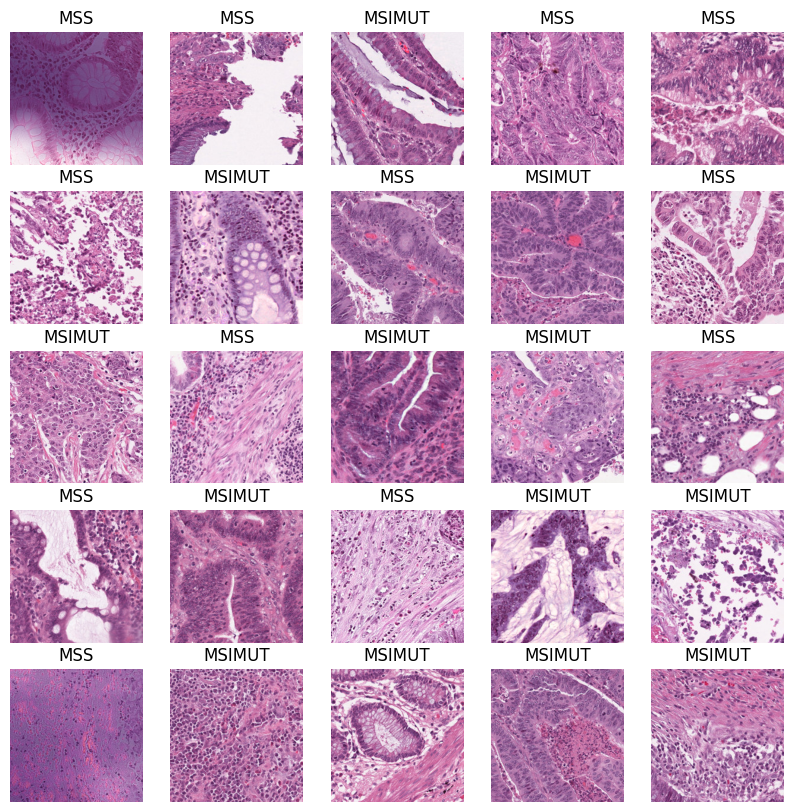

In [ ]:
train_root = pathlib.Path(train_dir)
class_names = sorted([j.name.split('/')[-1] for j in train_root.iterdir()])
class_names = np.array(class_names)
print('Class names: ', class_names)

img_gen = ImageDataGenerator(rescale = 1./255)
sample_train_data_gen = img_gen.flow_from_directory(batch_size = batch_size,
                                                    directory = train_dir,
                                                    shuffle = True,
                                                    target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                    classes = list(class_names))

sample_images, sample_labels = next(sample_train_data_gen)

def show_batch(img_batch, label_batch):
    plt.figure(figsize = (10, 10))
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(sample_images[i])
        plt.title(class_names[sample_labels[i] == 1][0])
        plt.axis('off')

show_batch(sample_images, sample_labels)

In [ ]:
train_image_generator = ImageDataGenerator(rescale = 1./255,
                                           rotation_range = 45,
                                           width_shift_range = 0.20,
                                           height_shift_range = 0.20,
                                           horizontal_flip = True,
                                           zoom_range = 0.5)

In [ ]:
val_image_generator = ImageDataGenerator(rescale = 1./255)


In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:

val_data_gen = val_image_generator.flow_from_directory(batch_size = batch_size,
                                                       directory = val_dir,
                                                       target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                       class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [ ]:
pip install scikeras


In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
# Data generators for training and validation
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.5
)

In [ ]:
val_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [ ]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = val_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
import os
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from time import time

In [ ]:
PATH = 'train-val-test-tcga-coad-msi-mss/tcga_coad_msi_mss/'
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'val')
test_dir = os.path.join(PATH, 'test')

In [ ]:
IMG_HEIGHT, IMG_WIDTH, batch_size = 224, 224, 32


In [ ]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
input_shape=(224, 224, 3)
def create_custom_model(learning_rate=0.0001, dropout_rate=0.5):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    x = Conv2D(64, kernel_size=(3, 3), activation='relu')(base_model.output)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    output = Dense(1, activation='sigmoid')(x)
    custom_model = Model(inputs=base_model.input, outputs=output)
    for layer in base_model.layers:
        layer.trainable = False
    custom_model.compile(
        optimizer=Adam(lr=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return custom_model


In [ ]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.5
)

In [ ]:
val_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [ ]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = val_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Wrap the custom model function with KerasClassifier for grid search
model = KerasClassifier(build_fn=create_custom_model, batch_size=batch_size, verbose=1,dropout_rate=0.5,learning_rate=0.0001)
# model.model_score = 0

In [ ]:
param_grid = {'dropout_rate': [0.4], 'epochs': [1], 'learning_rate': [0.001]}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2, error_score='raise')

In [ ]:
train_labels = train_data_gen.classes
val_labels = val_data_gen.classes

In [ ]:
print(np.unique(train_labels))

[0 1]


In [ ]:
print(type(train_labels))

<class 'numpy.ndarray'>


In [ ]:
(X_train, y_train) = train_data_gen.next()

In [ ]:
(X_val, y_val) = val_data_gen.next()

In [ ]:
print(X_train.shape)

(32, 224, 224, 3)


In [ ]:
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 [==============================] - 5s 5s/step - loss: 0.8659 - accuracy: 0.4762 - val_loss: 6.1363 - val_accuracy: 0.3750


1/1 [==============================] - 1s 976ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ....dropout_rate=0.4, epochs=1, learning_rate=0.001; total time=   9.4s


1/1 [==============================] - 6s 6s/step - loss: 1.0232 - accuracy: 0.4286 - val_loss: 1.5504 - val_accuracy: 0.6250


1/1 [==============================] - 1s 937ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END ....dropout_rate=0.4, epochs=1, learning_rate=0.001; total time=   9.9s


1/1 [==============================] - 1s 950ms/step
[CV] END ....dropout_rate=0.4, epochs=1, learning_rate=0.001; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 [==============================] - ETA: 0s - loss: 1.1733 - accuracy: 0.5312

1/1 [==============================] - 5s 5s/step - loss: 1.1733 - accuracy: 0.5312 - val_loss: 2.0702 - val_accuracy: 0.6250


In [ ]:
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: {:.2f}".format(grid_result.best_score_ * 100))


Best Parameters:  {'dropout_rate': 0.4, 'epochs': 1, 'learning_rate': 0.001}
Best Accuracy: 56.36


In [ ]:
import math
from math import *

In [ ]:
(X_val, y_val) = val_data_gen.next()

In [ ]:
print('Starting training...')
print('====================\n')

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=1e-2,
        patience=2,
        verbose=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='cnn.ckpt',
        save_best_only=True,
        monitor='val_loss',
        verbose=0
    )
]

start = time()
history = model.fit(X_train, y = y_train,
                    steps_per_epoch=len(X_train)//batch_size,
                    epochs=10,
                    validation_data=val_data_gen,
                    validation_steps=ceil(total_val/batch_size),
                    callbacks=callbacks)
end = time()

time_elapsed = end - start

print('\nTraining took {:.0f}h {:.0f}m {:.0f}s.'.format(time_elapsed // (60 * 60),
                                                        time_elapsed // 60,
                                                        time_elapsed % 60))

Starting training...



/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
1/1 [==============================] - 11s 11s/step - loss: 1.0343 - accuracy: 0.5625 - val_loss: 5.0036 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 4s 4s/step - loss: 3.6903 - accuracy: 0.5938 - val_loss: 1.5675 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 1.2992 - accuracy: 0.5312 - val_loss: 1.2261 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 1.8213 - accuracy: 0.4062 - val_loss: 0.9285 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 1.7209 - accuracy: 0.4375 - val_loss: 0.6925 - val_accuracy: 0.5100
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 1.1629 - accuracy: 0.5938 - val_loss: 1.0807 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 1.2090 - accuracy: 0.5312 - val_loss: 1.3208 - val_accuracy: 0.5000
Epoch 8/10
1/1 [=======================

In [ ]:
(X_val, y_val) = val_data_gen.next()

In [ ]:
print(model.score(X_val, y_val))

1/1 [==============================] - 1s 1s/step
0.53125


testing data ka gen banayenge like we did for the training data.

In [ ]:
test_data_gen = custom_data_generator(test_dir, batch_size, fraction_to_keep, target_size)


In [ ]:
sample_test_data_gen = img_gen.flow_from_directory(batch_size = batch_size,
                                                    directory = test_dir,
                                                    shuffle = True,
                                                    target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                    classes = list(class_names))

Found 1000 images belonging to 2 classes.


In [ ]:
test_image_generator = ImageDataGenerator(rescale = 1./255,
                                           rotation_range = 45,
                                           width_shift_range = 0.20,
                                           height_shift_range = 0.20,
                                           horizontal_flip = True,
                                           zoom_range = 0.5)

In [ ]:
test_data_gen = test_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = test_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [ ]:
# Data generators for training and validation
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.5
)

In [ ]:
test_data_gen = test_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=test_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
(X_test, y_test) = test_data_gen.next()

In [ ]:
print(model.score(X_test, y_test))

1/1 [==============================] - 0s 41ms/step
0.5
